<a href="https://colab.research.google.com/github/Sanjayvaradha/Basics/blob/main/Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
import tensorflow.keras
from tensorflow.keras.models import Sequential #linear stack of layers
from tensorflow.keras.layers import Dense #connect with each layer
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils.np_utils import to_categorical
import sys as _sys
from tensorflow.python.keras.utils.np_utils import to_categorical

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

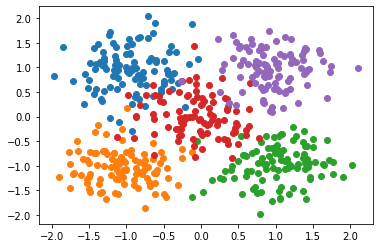

In [ ]:
 n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[0,0],[1,1]]
X,y = datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers,cluster_std=0.4) #cluster-S.D from center for spreading of points
plt.scatter(X[y==0,0],X[y==0,1]) 
plt.scatter(X[y==1,0],X[y==1,1]) #orange
plt.scatter(X[y==2,0],X[y==2,1]) #green
plt.scatter(X[y==3,0],X[y==3,1]) #red
plt.scatter(X[y==4,0],X[y==4,1])
print(y)

In [ ]:
y_cat = to_categorical(y,5) # 1starg y- that contains labels for setpoints, 2nd arg-number of classes
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h=model.fit(x=X,y=y_cat,verbose=1,batch_size=50,epochs=150)
plt.plot(h.history['accuracy'])
plt.xlabel(['epoch'])
plt.legend('accuracy')
plt.title('axx')

In [ ]:
def plot_boundary (X,y_cat,model): #y-label
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25) #accessing all rows, mini&max values of points in xaxis with indices 0-horizontal 
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25) # indices-1 - vertical before comma is rows ,after comma is columns
    xx,yy = np.meshgrid(x_span,y_span)# takes x&y  span vector which conatins ex:50 elements returns 2D 50x50 matrix first_arg gives copies of rows,2_arg gives copies of cols.
    xx_,yy_ = xx.ravel(),yy.ravel() # to convert into 1D
    grid = np.c_[xx_,yy_] #to concatenate so for every single yaxis there willbe 3xaxis cord's
    predict_fun = model.predict_classes(grid) # test all points in grid->returns probability for any labelled point as 1 or 0
    z= predict_fun.reshape(xx.shape)
    plt.contourf(xx,yy,z) #contourf draws lineaccording to each points probability, contourzones are increasing threshold of probability

prediction is [3]


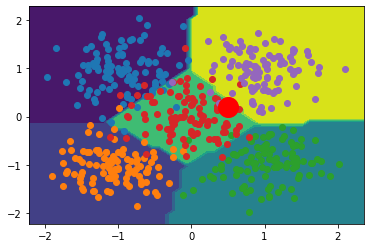

In [ ]:
plot_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1]) #orange
plt.scatter(X[y==2,0],X[y==2,1]) #green
plt.scatter(X[y==3,0],X[y==3,1]) #red
plt.scatter(X[y==4,0],X[y==4,1])  #purple
x=0.5
y=0.2
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x],[y],marker='o',markersize=20,color='r')
print('prediction is',prediction)